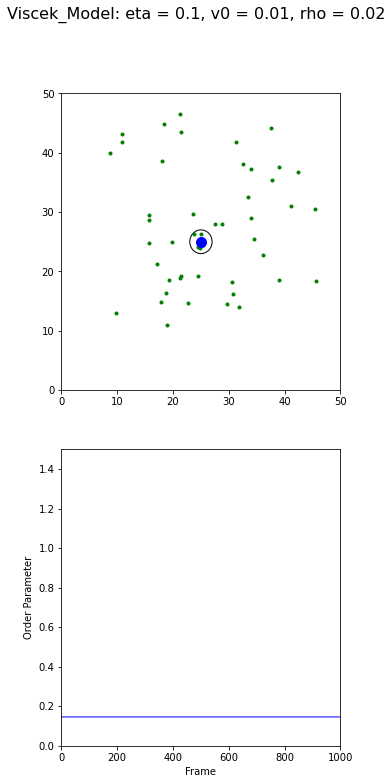

In [15]:
#==============================================================
#Author: Vishu Saini, MSc Physics, 215120051 , IIT Bombay
#Date: 14 June, 2022
#
#
#  Vicsek_Model
#
#  Aim: To simulate Viscek Model for 2 dimensions.
#  Steps of algorithm are: 
#
#  i) Setting up the model -
#  Viscek Model is set up along with its parameters. 
#  ii) Animating the data -
#  animation module of matplotlib is used to animate the data.
#
#==============================================================


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
import random
import math
from matplotlib.pyplot import figure
from random import randint

%matplotlib inline



## --------------------------------------------------------------------------------------------
##                                    0) Setting up the model 
## -------------------------------------------------------------------------------------------

# Parameters of the Model

v0 = 0.01   # speed of particles
eta = 0.1  # noise parameter  , Meaningful range: 0 to 1
L = 50     # Length of Box
N = 50      # Number of particles
R  = 1     # Interaction radius
dt = 1     # Time step
Nf = 1000   # Number of time steps
P = 0.3    # Avoidance parameter
Rp = 5     # Attactor radius
k = 1      # Force parameter
m = 100 # mass parameter
s = 0.1    # softening



random.seed(10)   # seed of random number generator

# setting up figures and axes for plots
fig, (axis,axis2) = plt.subplots(2,1, figsize=(5,12))

axis.set_xlim([0, 1*L])
axis.set_ylim([0, 1*L])
axis2.set_ylim([0, 1.5])
axis2.set_xlim([0, 1*Nf])
axis2.set_ylabel("Order Parameter")
axis2.set_xlabel("Frame")

fig.suptitle('Viscek_Model: eta = {}, v0 = {}, rho = {}'.format(eta,v0,N/(L*L)), fontsize=16)

# Attarctor position
xpr = 25
ypr = 25
# line data for plots. (These will be updated in animation)
line, = axis.plot([], [],'g.', lw = 20)
line2, = axis2.plot([], [],'b', lw = 1)
predator, = axis.plot([],[], 'b.', markersize = 20)     
    
# Draw attractor circle
Drawing_uncolored_circle = plt.Circle( (xpr, ypr ),
                                      Rp ,
                                      fill = False )
axis.add_artist( Drawing_uncolored_circle )



# Initial Particle positions : N x 1 array
xp = np.random.rand(N,1)*L
yp = np.random.rand(N,1)*L


# Initial Particle velocities : N x 1 array
theta = 2*np.pi*np.random.rand(N,1)
vx = v0*np.cos(theta)
vy = v0*np.sin(theta)

# what will our line dataset
# contain?
def init():
    line.set_data([], [])
    return line,

# initializing empty values
# for x and y co-ordinates
xdata, ydata = [], []
xcircle, ycirlce = [], []
x_data, y_data = [], []


## ---------------------------------------------------------------------------------------------------
##                                   1) Animating the data 
## ---------------------------------------------------------------------------------------------------

# acceleration calculation 
def getAcc(x, y):
    
    
    a = np.zeros((N,2))
    
    for i in range(N):
        
         a[i,0] = -(k/m)*(x[i] - xpr)/((x[i] - xpr)**2 + (y[i] - ypr)**2 + s**2)**(0.5)     # ax
     
         a[i,1]=  -(k/m)*(y[i] - ypr)/((x[i] - xpr)**2 + (y[i] - ypr )**2 + s**2)**(0.5)     # ay
        
        
    return a
    


# animation function
def animate(i):                 # i is the dummy index that changes with frame, 0 to Nf-1
    acc = getAcc(xp,yp)       # get accelerations
    
    for j in range(N):
        # (1/2) kick
        vx[j] = vx[j] + dt*acc[j,0]/2
        vy[j] = vy[j] + dt*acc[j,1]/2
        
        
        # drift
        xp[j] = xp[j] + vx[j]*dt
        yp[j] = yp[j] + vy[j]*dt
        
         # apply periodic BCs
       # xp[j] = xp[j] % L
        #yp[j] = yp[j] % L
        
        
    acc = getAcc(xp,yp)  # update accelerations
        
    for j in range(N):
         # (1/2) kick
         vx[j] = vx[j] + dt*acc[j,0]/2
         vy[j] = vy[j] + dt*acc[j,1]/2
       
    
    
    # update order parameter
    Sx = np.sum(np.cos(theta))
    Sy = np.sum(np.sin(theta))
    phi = ((Sx)**2 + (Sy)**2)**(0.5)/N
    #print(phi)
    
    pt = randint(1,9)
    
    #if (i%10==0):
    xdata.append(i)
    ydata.append(phi)
    x_data.append(xp)
    y_data.append(yp)
    
        
    line.set_data(xp, yp)
    line2.set_data(xdata, ydata)
    predator.set_data(xpr,ypr)
    # Draw a circle
    
     
    return line,


# calling the animation function    
anim = animation.FuncAnimation(fig, animate, init_func = init, frames = Nf, interval = 20,blit = True)
 
# saves the animation in our desktop
anim.save('Vicsek_model.mp4', writer = 'ffmpeg', fps = 30)


HTML(anim.to_html5_video())



#print(y_data)